# Artificial Intelligence for Trading 
**Contacts: novella@di.uniroma1.it, coletta@di.uniroma1.it, prata@di.uniroma1.it**

### Lab Lecture 2 — 2021-10-28
## Manipulating Real Stock Market Dataset (Part 2)

What you will learn:

- computing daily return of an asset and use it to evaluate the risk of an investment 
- evaluating assets correlation 

- computing and using technical analysis indicators 
- technical tnalysis libraries for financial time series datasets

At the end of the lesson we will present **Homework 1!!!**  🎉

### Download this Notebook
This notebook and more is available for download at: https://github.com/matteoprata/AI4Trading

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.width = 1200

import matplotlib
matplotlib.rc('figure', figsize=(10,3), dpi=200)


ALL_SYMBOLS = ["AAPL", "MSFT", "AMZN", "CSCO", "DIS", "FB", "GOOG", "KO", "PEP", "NFLX", "VZ"]
DATE_RANGES = ('2019-09-01', '2021-09-01')


def adjusted_close_symbols(symbols, date_range):
    """ Joins an empty DataFrame with index, with multiple stocks dataframes. """

    # dates is formatted as YYYY-MM-DD
    dates = pd.date_range(*date_range)

    # An empty dataframe
    df1 = pd.DataFrame(index=dates) # the dataframe only with the index

    for sym in symbols:
        path_to_file = os.path.join("data", "%s.csv" % sym)
        dfSYM = pd.read_csv(path_to_file, index_col="Date", parse_dates=True, usecols=["Date", "Adj Close"]) # na_values=['nan']
        dfSYM = dfSYM.rename(columns= {'Adj Close': sym})
        df1 = df1.join(dfSYM, how="inner")
    return df1

df = adjusted_close_symbols(ALL_SYMBOLS, DATE_RANGES)
df

,AAPL,MSFT,AMZN,CSCO,DIS,FB,GOOG,KO,PEP,NFLX,VZ
2019-09-03,50.594364,133.285645,1789.839966,43.346085,135.498199,182.389999,1168.390015,51.474342,128.853714,289.290009,52.648903
2019-09-04,51.452770,134.843460,1800.619995,44.110470,137.068787,187.139999,1181.410034,51.911831,130.437866,291.519989,52.775894
2019-09-05,52.458759,137.214462,1840.719971,45.135860,138.013123,190.899994,1211.380005,51.306805,128.347198,293.250000,53.147812
2019-09-06,52.453835,136.283722,1833.510010,45.527374,138.718903,187.490005,1204.930054,51.409191,129.659195,290.170013,53.574154
2019-09-09,52.677662,134.735703,1831.349976,45.285011,138.003189,188.759995,1204.410034,50.748310,128.743622,294.339996,53.211308
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25,148.360001,302.010010,3299.179932,58.951748,178.309998,368.390015,2859.000000,55.650002,154.143448,547.580017,54.285309
2021-08-26,147.539993,299.089996,3316.000000,58.802757,176.559998,364.380005,2842.459961,55.123970,153.577332,550.119995,53.959179
2021-08-27,148.600006,299.720001,3349.629883,58.623966,180.139999,372.630005,2891.010010,55.233147,153.885223,558.919983,54.127186
2021-08-30,153.119995,303.589996,3421.570068,58.733227,179.979996,380.660004,2909.389893,55.759178,154.938004,566.179993,54.127186


##### Plotting Daily Returns 

The **daily return (or intraday return) measures the return generated by a stock, based on its price from the opening of a trading day to its close**. A positive return means the stock has grown in value, while a negative return means it has lost value. A stock with lower positive and negative daily returns is typically less risky than a stock with higher daily returns, which creates larger swings in value.

$$ r(t) = \frac{m(t)-m(t-1)}{m(t-1)} = \frac{m(t)}{m(t-1)} -1$$

In [2]:
df = adjusted_close_symbols(ALL_SYMBOLS, DATE_RANGES)
df_ret = df / df.shift(-1) - 1
df_ret = df_ret[:-1]

stock1, stock2 = "MSFT", "GOOG"
df_ret_s1_s2 = df_ret[[stock1, stock2]]
df_ret_s1_s2

,MSFT,GOOG
2019-09-03,-0.011553,-0.011021
2019-09-04,-0.017280,-0.024740
2019-09-05,0.006829,0.005353
2019-09-06,0.011489,0.000432
2019-09-09,0.010582,-0.001318
...,...,...
2021-08-24,0.002020,-0.003858
2021-08-25,0.009763,0.005819
2021-08-26,-0.002102,-0.016793
2021-08-27,-0.012747,-0.006317


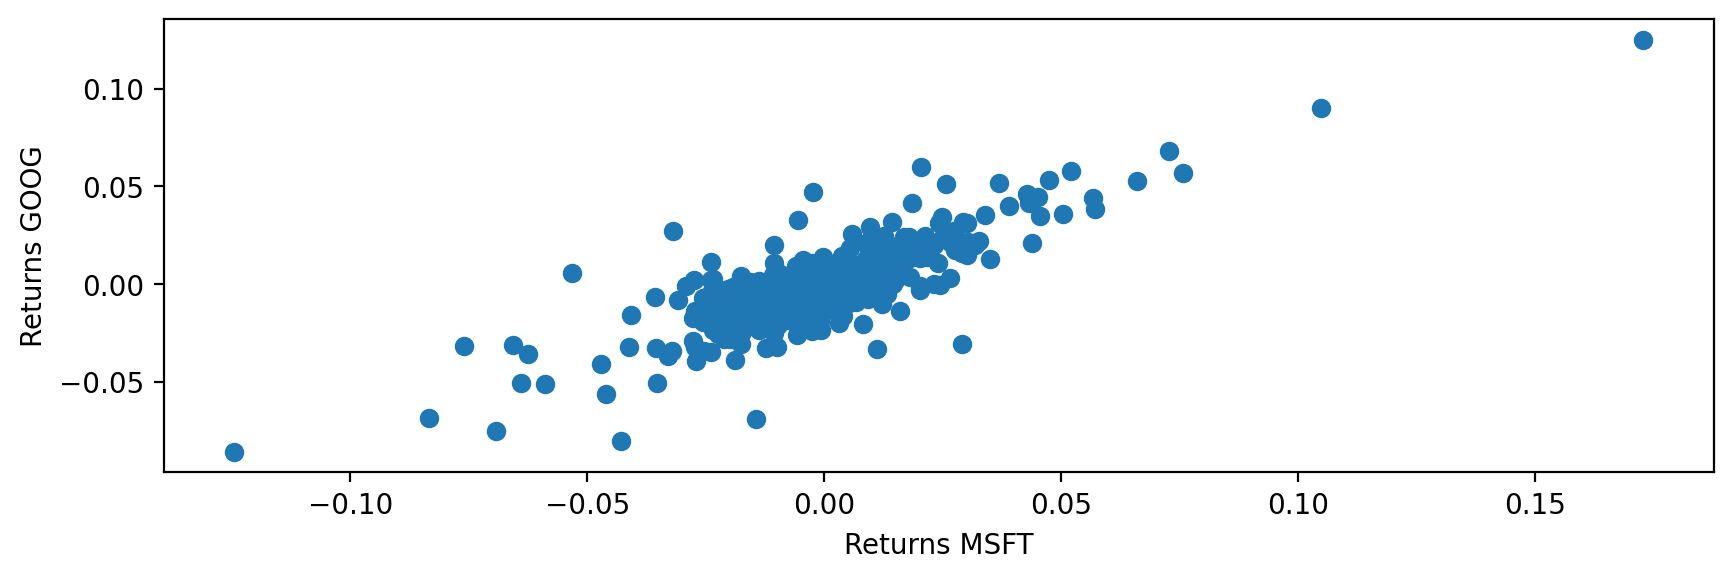

In [3]:
plt.scatter(df_ret_s1_s2[stock1], df_ret_s1_s2[stock2])
plt.xlabel('Returns ' + stock1)
plt.ylabel('Returns ' + stock2)
plt.show()

##### Stocks Correlation
Pearson correlation coefficient ( https://en.wikipedia.org/wiki/Pearson_correlation_coefficient )
<img src="data/press_images/correlation.png" />

In [4]:
corr = df_ret.corr()
corr

,AAPL,MSFT,AMZN,CSCO,DIS,FB,GOOG,KO,PEP,NFLX,VZ
AAPL,1.000000,0.812903,0.671977,0.606365,0.461863,0.720778,0.717593,0.521007,0.629991,0.529728,0.444771
MSFT,0.812903,1.000000,0.707976,0.661474,0.520232,0.728584,0.818804,0.550676,0.698937,0.573765,0.503770
AMZN,0.671977,0.707976,1.000000,0.441129,0.335741,0.654661,0.657130,0.288564,0.447146,0.630140,0.299888
CSCO,0.606365,0.661474,0.441129,1.000000,0.579439,0.505846,0.599635,0.560096,0.637099,0.305480,0.571684
DIS,0.461863,0.520232,0.335741,0.579439,1.000000,0.438032,0.549088,0.615303,0.516569,0.233332,0.451313
FB,0.720778,0.728584,0.654661,0.505846,0.438032,1.000000,0.760547,0.397800,0.516568,0.554860,0.368177
GOOG,0.717593,0.818804,0.657130,0.599635,0.549088,0.760547,1.000000,0.548780,0.603281,0.517480,0.487925
KO,0.521007,0.550676,0.288564,0.560096,0.615303,0.397800,0.548780,1.000000,0.772428,0.196861,0.659974
PEP,0.629991,0.698937,0.447146,0.637099,0.516569,0.516568,0.603281,0.772428,1.000000,0.393655,0.675559
NFLX,0.529728,0.573765,0.630140,0.305480,0.233332,0.554860,0.517480,0.196861,0.393655,1.000000,0.233007


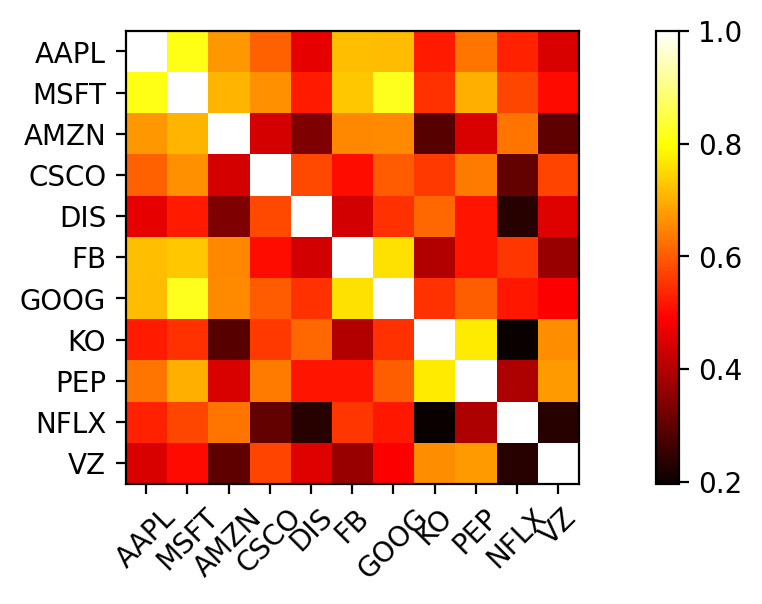

In [5]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

##### Risk of a Stock

In [6]:
df_ret.mean()

AAPL   -0.001910
MSFT   -0.001397
AMZN   -0.001120
CSCO   -0.000386
DIS    -0.000292
FB     -0.001174
GOOG   -0.001620
KO     -0.000022
PEP    -0.000218
NFLX   -0.001027
VZ      0.000013
dtype: float64

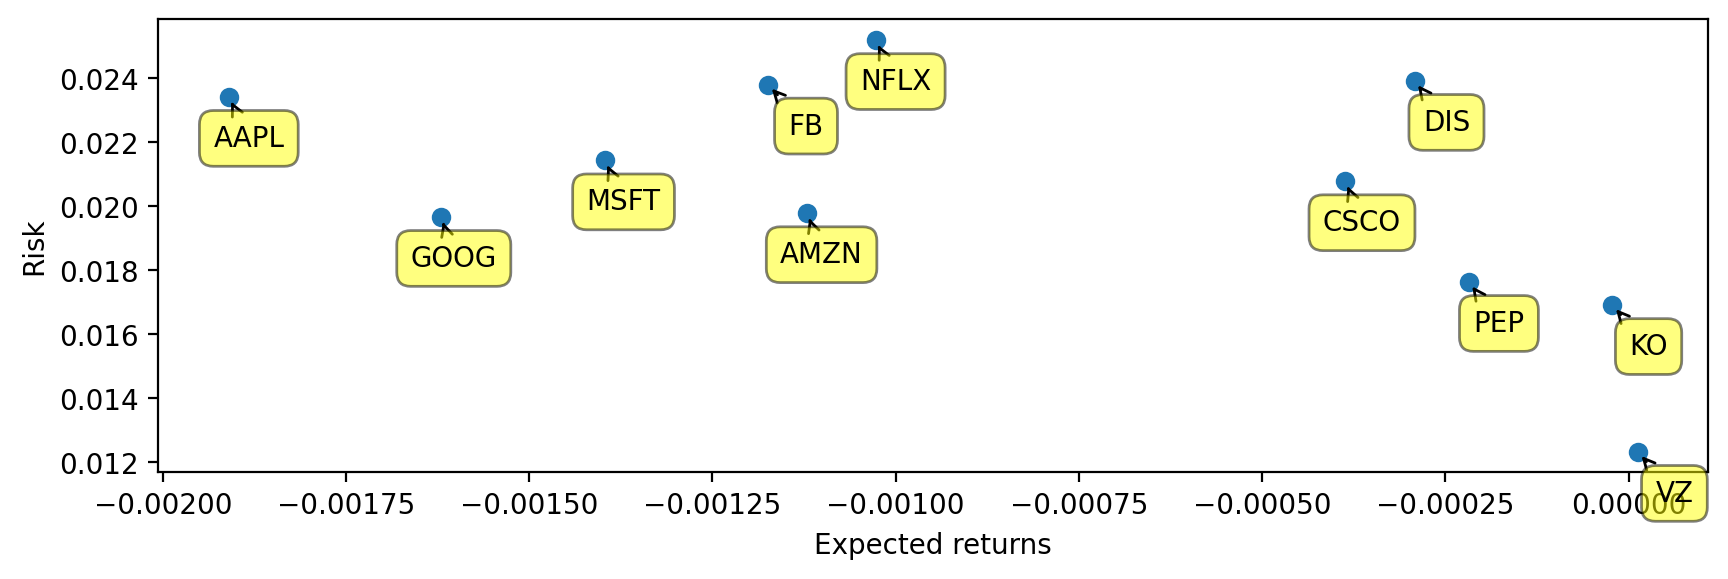

In [7]:
plt.scatter(df_ret.mean(), df_ret.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(df_ret.columns, df_ret.mean(), df_ret.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

## Introduction to NumPy
**NumPy** (<a href="https://numpy.org/doc/1.19/">doc</a>) is an open source project aiming to enable numerical computing with Python. NumPy is developed in
the open on GitHub, through the consensus of the NumPy and wider scientific Python community.

NumPy’s main object is the **homogeneous multidimensional array**. It is a table of elements (usually numbers),
all of the same type, indexed by a tuple of non-negative integers. In NumPy dimensions are called axes.
NumPy’s array class is called ndarray. It is also known by the alias array.

It is related to pandas as a DataFrame is a wrapper of an ndarray. Treating data as ndarrays rather than
just DataFrames will give you access to many additional routines.

In [8]:
import numpy as np

In [9]:
# creating ndarrays
nd1 = np.array([1,2,3])  # 1D
nd2 = np.array([[1,2,3], [4,5,6], [7,8,9]])  # 2D

print(nd1)
print(nd2)

[1 2 3]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [10]:
# init ndarrays
nd_zeros = np.zeros((3,3))  # also ones
nd_rand_int = np.random.randint(0,100,(4,4))
nd_rand = np.random.rand(4,4)

print(nd_zeros)
print(nd_rand_int)
print(nd_rand)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[27  5 46 34]
 [97 74 99  7]
 [92 22 41 39]
 [12 44 14  7]]
[[0.98407998 0.92055834 0.26581329 0.53486019]
 [0.81403525 0.43564817 0.57790855 0.41458381]
 [0.35558545 0.42478806 0.6977239  0.38759374]
 [0.11209397 0.99771678 0.06061671 0.19455028]]


In [11]:
# Task: extract an ndarray from a DataFrame object and play with slicing 
df = adjusted_close_symbols(["AAPL", "FB", "MSFT", "VZ"], ('2020-10-01', '2020-10-09'))

nd1 = df.values
print(nd1, type(nd1))

# access a value
print("\nElement in 0,0:", nd1[0,0])  # [row, column]
print("\nElement in 2,1:", nd1[2,1])  # [row, column]

# access slices
print(nd1[0:3,1:3])  # [row, column]

# access rows and columns
print("\nRow 0:", nd1[0,:])
print("\nColumn 0:", nd1[:,0])

# negative indices
print(nd1[-1, 1:3])

# Replace slices
nd1[:3,:2] = nd1[-3:,-2:]
print(nd1)

[[116.04364  266.630005 210.528198  56.273159]
 [112.297729 259.940002 204.315216  56.074383]
 [115.755478 264.649994 208.467117  56.471939]
 [112.436829 258.660004 204.03775   56.282619]
 [114.344559 258.119995 207.922104  56.424606]
 [114.23526  263.76001  208.665298  56.623581]
 [116.222481 264.450012 213.847733  56.757519]] <class 'numpy.ndarray'>

Element in 0,0: 116.04364

Element in 2,1: 264.649994
[[266.630005 210.528198]
 [259.940002 204.315216]
 [264.649994 208.467117]]

Row 0: [116.04364  266.630005 210.528198  56.273159]

Column 0: [116.04364  112.297729 115.755478 112.436829 114.344559 114.23526
 116.222481]
[264.450012 213.847733]
[[207.922104  56.424606 210.528198  56.273159]
 [208.665298  56.623581 204.315216  56.074383]
 [213.847733  56.757519 208.467117  56.471939]
 [112.436829 258.660004 204.03775   56.282619]
 [114.344559 258.119995 207.922104  56.424606]
 [114.23526  263.76001  208.665298  56.623581]
 [116.222481 264.450012 213.847733  56.757519]]


In [12]:
# Task: operations over axes

np.random.seed(199)  # seed the random generator
d2_rand_int = np.random.randint(0,100,(3,7))
print(d2_rand_int) 

print("\nSum of each column:\n", d2_rand_int.sum(axis=0))  # sum the vales on the rows, encoded as 0
print("\nSum of each row:\n", d2_rand_int.sum(axis=1))  # sum the vales on the rows, encoded as 0

print("\nMinimum of each row:\n", d2_rand_int.min(axis=0))
print("\nMaximum of each row:\n", d2_rand_int.min(axis=1))
print("\nMean of all:\n", d2_rand_int.mean())  # axis 1 = what to iterate first

[[36 32 71 66 13 58 72]
 [18 85 82 11 94 98 62]
 [ 3 19 10 86 98 68 81]]

Sum of each column:
 [ 57 136 163 163 205 224 215]

Sum of each row:
 [348 450 365]

Minimum of each row:
 [ 3 19 10 11 13 58 62]

Maximum of each row:
 [13 11  3]

Mean of all:
 55.38095238095238


In [13]:
# Task: linear algebra 

a = np.array([[1,2,3,4,5], [10,20,30,40,50]])
b = np.array([[100,200,300,400,500], [1,2,3,4,5]])
print("A matrix\n", a)
print("\nB matrix\n", b)

# element wise multiplication 
print("\nMultiplication by 2\n", 2*a) # same for +, -, /

# element wise multiplication
print("\nMultiplication a and b\n", a/b)  

# matrix multiplication
print("\nMat mul a and b\n", np.matmul(a, np.transpose(b)))

# When the dataframe contains only numbers (exclusing hedar and index) and have the same index
# you can use dataframes as if they were ndarrays 

A matrix
 [[ 1  2  3  4  5]
 [10 20 30 40 50]]

B matrix
 [[100 200 300 400 500]
 [  1   2   3   4   5]]

Multiplication by 2
 [[  2   4   6   8  10]
 [ 20  40  60  80 100]]

Multiplication a and b
 [[ 0.01  0.01  0.01  0.01  0.01]
 [10.   10.   10.   10.   10.  ]]

Mat mul a and b
 [[ 5500    55]
 [55000   550]]


In [14]:
# Task: boolean indexing 

d1_rand = np.random.rand(20)
indices = np.array([0,10,15,19])
print(d1_rand)
print(d1_rand[indices])

# select all the elements lower than the mean from array
mean = d1_rand.mean()
print()
print(mean)
print(d1_rand < mean)  # mask, they could also be two vectors 

d1_rand = d1_rand[d1_rand < mean]
print(d1_rand)

[0.58071313 0.1159047  0.10848263 0.89170005 0.44430729 0.5391208
 0.58883459 0.53934524 0.07999421 0.35666373 0.3110334  0.85744435
 0.8272166  0.49684329 0.80270055 0.48055977 0.19504884 0.84527678
 0.30688697 0.26934588]
[0.58071313 0.3110334  0.48055977 0.26934588]

0.4818711392709794
[False  True  True False  True False False False  True  True  True False
 False False False  True  True False  True  True]
[0.1159047  0.10848263 0.44430729 0.07999421 0.35666373 0.3110334
 0.48055977 0.19504884 0.30688697 0.26934588]


In [15]:
# SPEED: other reasons to use numpy vectorization rather than iterative processing

import time

def manual_sum(arr):
    sum = 0
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            sum += arr[i,j]
    return sum

def summing(n):
    """ Timing numpy. """

    np.random.seed(199)  # seed the random generator
    d1_rand = np.random.rand(n,n)
    
    # summing vector elements with numpy
    t1 = time.time()
    print(np.sum(d1_rand), "numpy says")
    t2 = time.time()
    elapsed_np = t2 - t1
    
    # summing vector elements iteratively 
    t1 = time.time()
    print(manual_sum(d1_rand), "iterative says")
    t2 = time.time()
    elapsed_man = t2 - t1

    print("\nSeconds elapsed for numpy sum", elapsed_np)
    print("Seconds elapsed for manual sum", elapsed_man)

summing(8000)

# Seconds elapsed for numpy sum 0.08274292945861816
# Seconds elapsed for manual sum 11.811549272537231

32001101.509190384 numpy says
32001101.509193324 iterative says

Seconds elapsed for numpy sum 0.053572893142700195
Seconds elapsed for manual sum 9.7273850440979


## Fundamental vs Techinical Analysis 

Trading firms use **Fundamental analysis** and **technical analysis** to forecast price trend of the stock in future. **Fundamental Analysis** exams the basic economic factors which drives commodities, stocks and bonds prices. 
**Technical Analysis** forecasts the price of a share according its the past performance statistics, assuming that the price of a share is mainly based on demand and supply forces operating in the stock market. 

<br> 
<br> 

<img src="data/press_images/tech_vs_fund.png" width="800" height="1100"/>

#### Handling Missing Values

Before start we discuss how to handle missing values in financial data:

In [16]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.display.width = 1200
from IPython.display import Image
from IPython.core.display import HTML 
import warnings
warnings.filterwarnings('ignore')


import matplotlib
matplotlib.rc('figure', figsize=(10,3), dpi=200)
df = pd.read_csv("data/AAPL_missing.csv")
print(df)

           Date        Open        High         Low       Close       Volume
0    2019-09-03   51.607498   51.744999   51.055000   51.424999   80092000.0
1    2019-09-04   52.097500   52.369999   51.830002   52.297501   76752400.0
2    2019-09-05         NaN         NaN         NaN         NaN          NaN
3    2019-09-06         NaN         NaN         NaN         NaN          NaN
4    2019-09-09   53.709999   54.110001   52.767502   53.542500  109237600.0
..          ...         ...         ...         ...         ...          ...
499  2021-08-25  149.809998  150.320007  147.800003  148.360001   58991300.0
500  2021-08-26  148.350006  149.119995  147.509995  147.539993   48597200.0
501  2021-08-27         NaN         NaN         NaN         NaN          NaN
502  2021-08-30         NaN         NaN         NaN         NaN          NaN
503  2021-08-31  152.660004  152.800003  151.289993  151.830002   86453100.0

[504 rows x 6 columns]


##### Fill missing NaNs
How we can handle missing data in the current **DataFrame**? Remember that, while NaNs are rare in daily data, 
if we work on HFT (i.e., milliseconds) **NaN** values are most likely.


<AxesSubplot:>

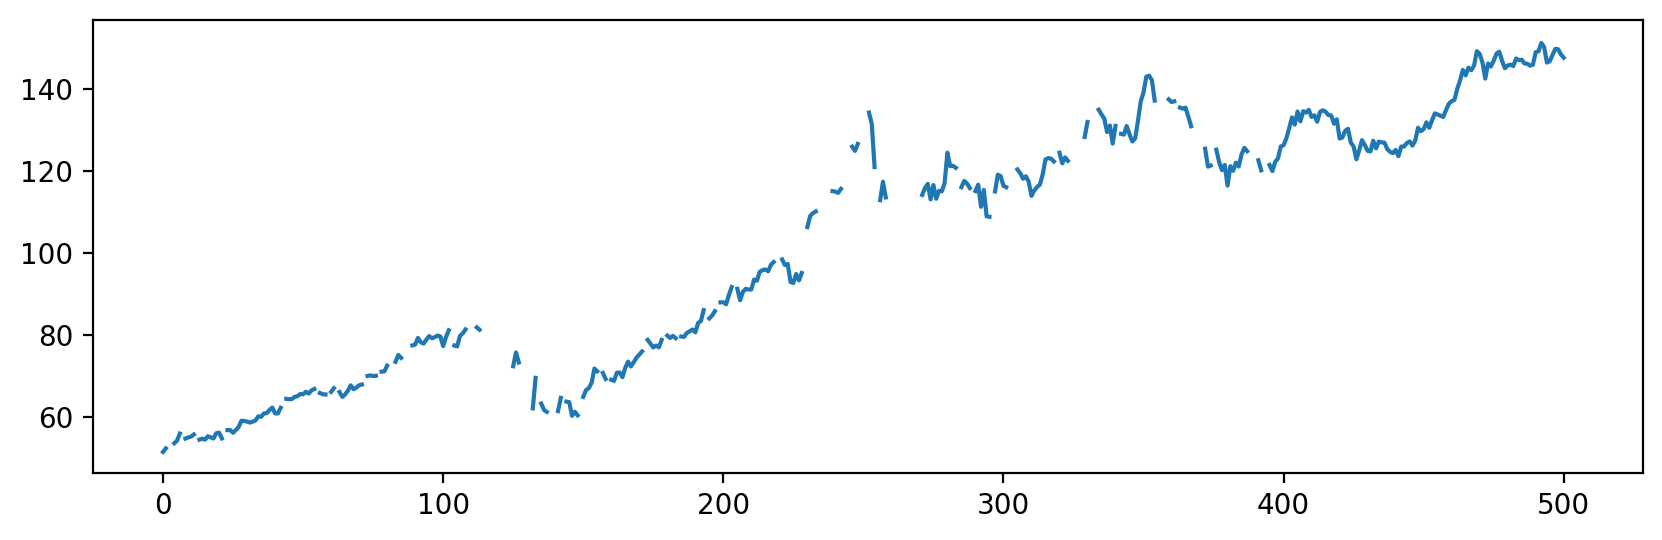

In [17]:
df["Close"].plot()

******  Zero fill approach:    *******
           Date        Open        High         Low       Close       Volume
0    2019-09-03   51.607498   51.744999   51.055000   51.424999   80092000.0
1    2019-09-04   52.097500   52.369999   51.830002   52.297501   76752400.0
2    2019-09-05    0.000000    0.000000    0.000000    0.000000          0.0
3    2019-09-06    0.000000    0.000000    0.000000    0.000000          0.0
4    2019-09-09   53.709999   54.110001   52.767502   53.542500  109237600.0
..          ...         ...         ...         ...         ...          ...
499  2021-08-25  149.809998  150.320007  147.800003  148.360001   58991300.0
500  2021-08-26  148.350006  149.119995  147.509995  147.539993   48597200.0
501  2021-08-27    0.000000    0.000000    0.000000    0.000000          0.0
502  2021-08-30    0.000000    0.000000    0.000000    0.000000          0.0
503  2021-08-31  152.660004  152.800003  151.289993  151.830002   86453100.0

[504 rows x 6 columns]


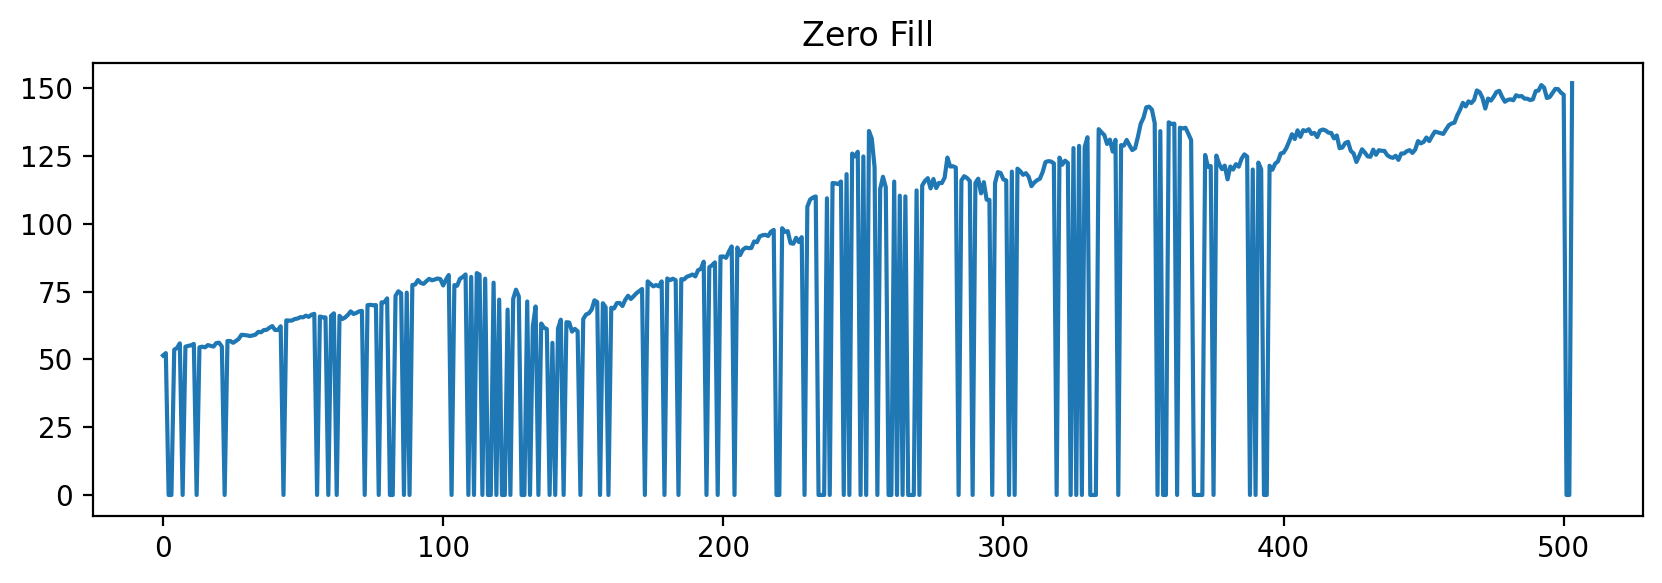

In [18]:
# zeros, 
print("******  Zero fill approach:    *******")
df_tmp = df.fillna(0)
print(df_tmp)  # replace all nans with 0
df_tmp["Close"].plot(title="Zero Fill")
plt.show()

******  Bfill approach:    *******
           Date        Open        High         Low       Close       Volume
0    2019-09-03   51.607498   51.744999   51.055000   51.424999   80092000.0
1    2019-09-04   52.097500   52.369999   51.830002   52.297501   76752400.0
2    2019-09-05   53.709999   54.110001   52.767502   53.542500  109237600.0
3    2019-09-06   53.709999   54.110001   52.767502   53.542500  109237600.0
4    2019-09-09   53.709999   54.110001   52.767502   53.542500  109237600.0
..          ...         ...         ...         ...         ...          ...
499  2021-08-25  149.809998  150.320007  147.800003  148.360001   58991300.0
500  2021-08-26  148.350006  149.119995  147.509995  147.539993   48597200.0
501  2021-08-27  152.660004  152.800003  151.289993  151.830002   86453100.0
502  2021-08-30  152.660004  152.800003  151.289993  151.830002   86453100.0
503  2021-08-31  152.660004  152.800003  151.289993  151.830002   86453100.0

[504 rows x 6 columns]


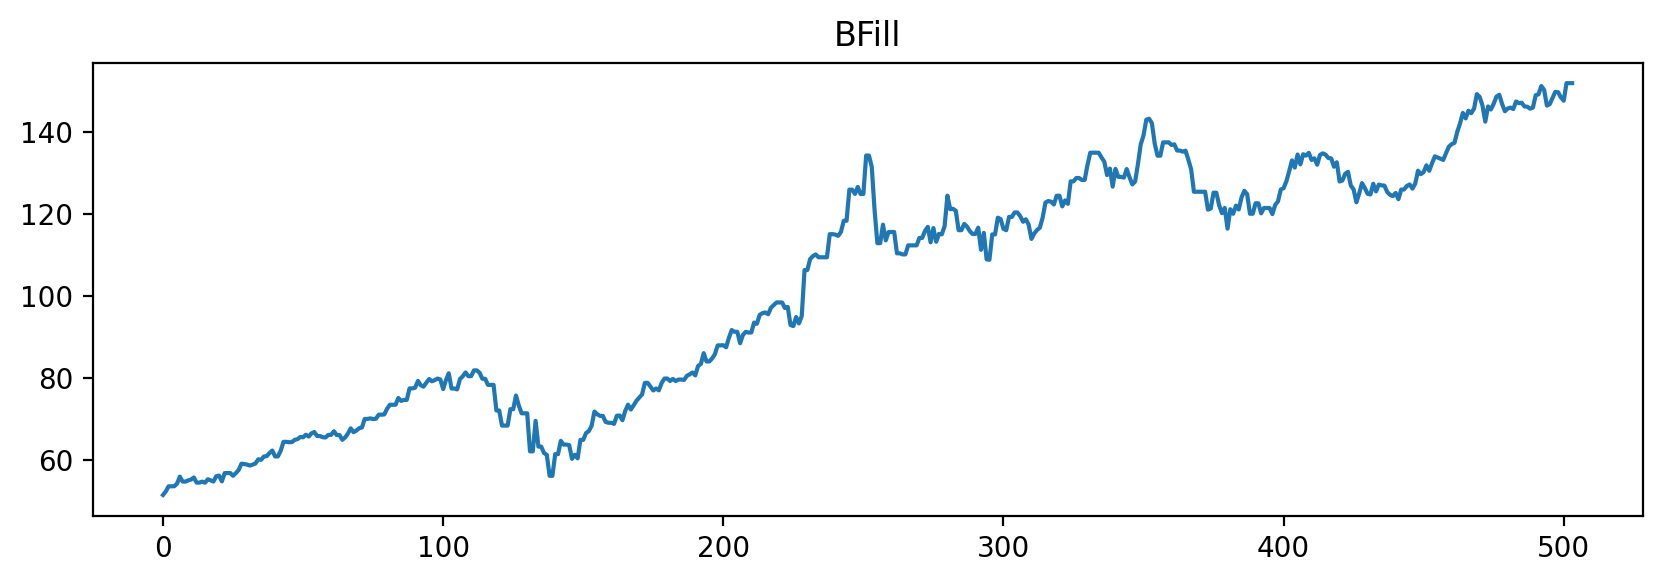

In [19]:
print("******  Bfill approach:    *******")
df_tmp = df.fillna(method="bfill") 
print(df_tmp)  # use next valid observation to fill gap.
df_tmp["Close"].plot(title="BFill")
plt.show()

******  Ffill approach:    *******
           Date        Open        High         Low       Close       Volume
0    2019-09-03   51.607498   51.744999   51.055000   51.424999   80092000.0
1    2019-09-04   52.097500   52.369999   51.830002   52.297501   76752400.0
2    2019-09-05   52.097500   52.369999   51.830002   52.297501   76752400.0
3    2019-09-06   52.097500   52.369999   51.830002   52.297501   76752400.0
4    2019-09-09   53.709999   54.110001   52.767502   53.542500  109237600.0
..          ...         ...         ...         ...         ...          ...
499  2021-08-25  149.809998  150.320007  147.800003  148.360001   58991300.0
500  2021-08-26  148.350006  149.119995  147.509995  147.539993   48597200.0
501  2021-08-27  148.350006  149.119995  147.509995  147.539993   48597200.0
502  2021-08-30  148.350006  149.119995  147.509995  147.539993   48597200.0
503  2021-08-31  152.660004  152.800003  151.289993  151.830002   86453100.0

[504 rows x 6 columns]


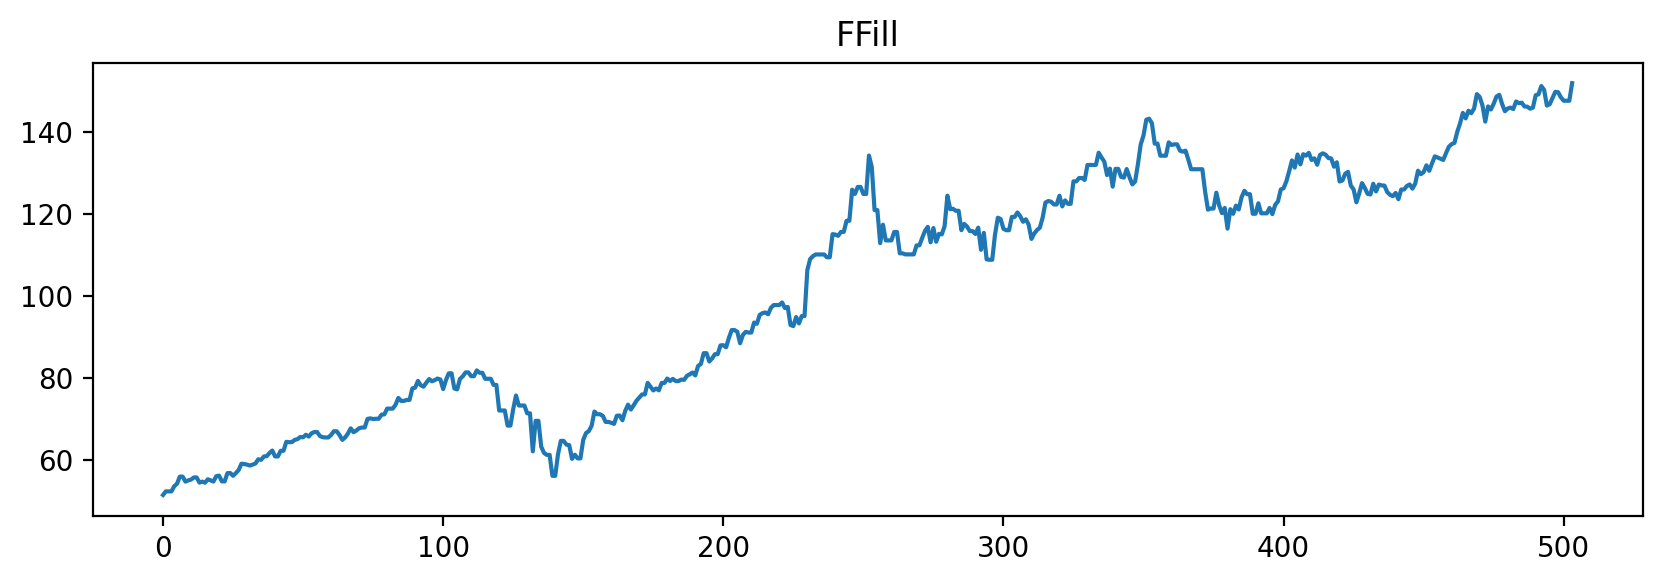

In [20]:
print("******  Ffill approach:    *******")
df_tmp = df.fillna(method="ffill") 
print(df_tmp)  # propagate last valid observation forward to next valid
df_tmp["Close"].plot(title="FFill")
plt.show()

In [21]:
# close will be the same, no trades --> no changes
df["Close"].fillna(method="ffill", inplace=True)
# volume will be zero, no trades --> no exchange volume 
df["Volume"].fillna(0, inplace=True)
# Open, High and Low will be as the close, as we don't have trades and changes in this candlestick
df["Open"].fillna(df["Close"], inplace=True)
df["High"].fillna(df["Close"], inplace=True)
df["Low"].fillna(df["Close"], inplace=True)

print(df)

           Date        Open        High         Low       Close       Volume
0    2019-09-03   51.607498   51.744999   51.055000   51.424999   80092000.0
1    2019-09-04   52.097500   52.369999   51.830002   52.297501   76752400.0
2    2019-09-05   52.297501   52.297501   52.297501   52.297501          0.0
3    2019-09-06   52.297501   52.297501   52.297501   52.297501          0.0
4    2019-09-09   53.709999   54.110001   52.767502   53.542500  109237600.0
..          ...         ...         ...         ...         ...          ...
499  2021-08-25  149.809998  150.320007  147.800003  148.360001   58991300.0
500  2021-08-26  148.350006  149.119995  147.509995  147.539993   48597200.0
501  2021-08-27  147.539993  147.539993  147.539993  147.539993          0.0
502  2021-08-30  147.539993  147.539993  147.539993  147.539993          0.0
503  2021-08-31  152.660004  152.800003  151.289993  151.830002   86453100.0

[504 rows x 6 columns]


<AxesSubplot:>

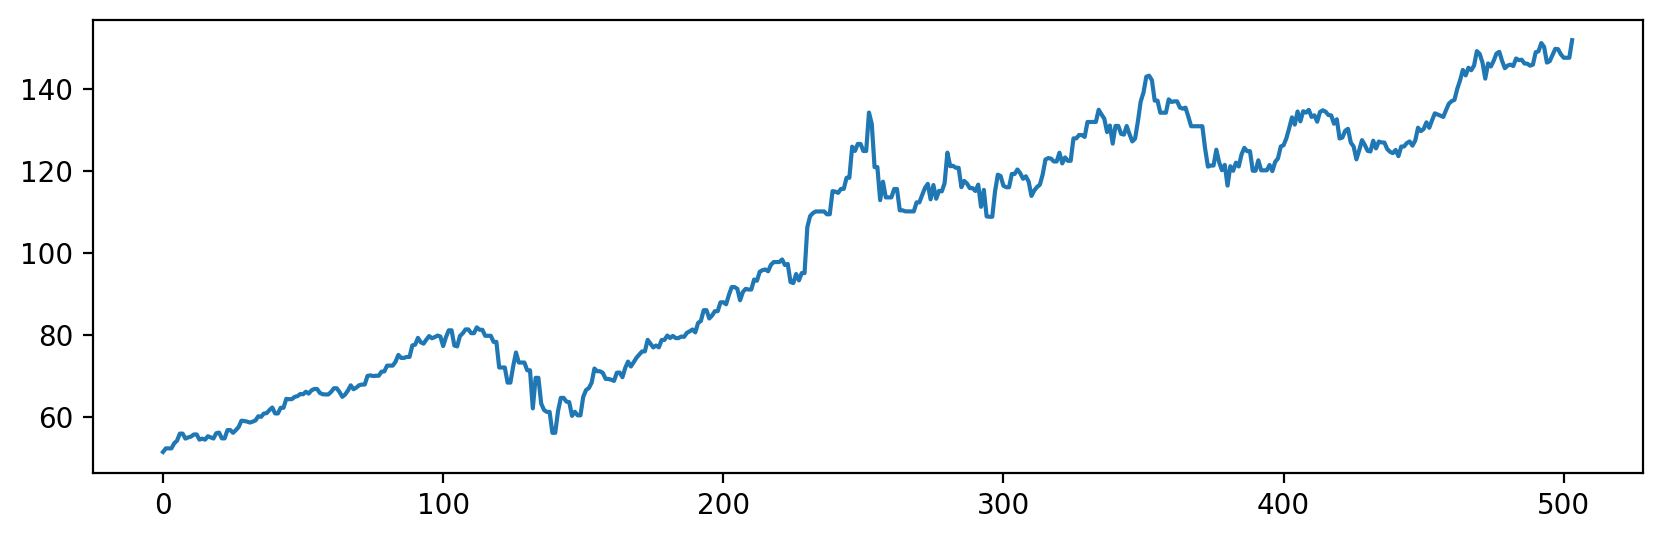

In [22]:
# plot close
df["Close"].plot()

### Technical Indicators

##### MACD
The **Moving Average Convergence Divergence** momentum indicator to identify buy or sell opportunities. It is based on the difference of a **short-term** and **long-term** price trend. MACD can be calculated very simply by subtracting the 26 period EMA from the 12 period **EMA**. The **MACD** chart commonly will include a signal line plotted on top of the MACD. Whenever the MACD crosses above the signal line it is a bullish signal, and a bearish signal when it falls below. 


##### EMA
The **EMA** is an **exponential moving average**, which is a sinmple moving average but it weights more recent data points. 

<img src="data/press_images/ema.png" width="800" height="1100"/>

A common choice for the **smoothing factor** is 2.


In [23]:
def calculate_ema(df, days, smoothing=2, column="Close"):
    data_col = df[column]
    # first let's compute the simple moving average for the first days
    ema = [np.mean(data_col[:days])]
    
    ema = [np.nan] * (days - 1) + ema 
    # iteratively compute the EMA for each subsequent day
    for price in data_col[days:]:
        ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
    
    return ema

In [24]:
df["EMA_10"] = calculate_ema(df, days=10)
print(df)

           Date        Open        High         Low       Close       Volume      EMA_10
0    2019-09-03   51.607498   51.744999   51.055000   51.424999   80092000.0         NaN
1    2019-09-04   52.097500   52.369999   51.830002   52.297501   76752400.0         NaN
2    2019-09-05   52.297501   52.297501   52.297501   52.297501          0.0         NaN
3    2019-09-06   52.297501   52.297501   52.297501   52.297501          0.0         NaN
4    2019-09-09   53.709999   54.110001   52.767502   53.542500  109237600.0         NaN
..          ...         ...         ...         ...         ...          ...         ...
499  2021-08-25  149.809998  150.320007  147.800003  148.360001   58991300.0  148.394040
500  2021-08-26  148.350006  149.119995  147.509995  147.539993   48597200.0  148.238759
501  2021-08-27  147.539993  147.539993  147.539993  147.539993          0.0  148.111711
502  2021-08-30  147.539993  147.539993  147.539993  147.539993          0.0  148.007762
503  2021-08-31  152.

<AxesSubplot:>

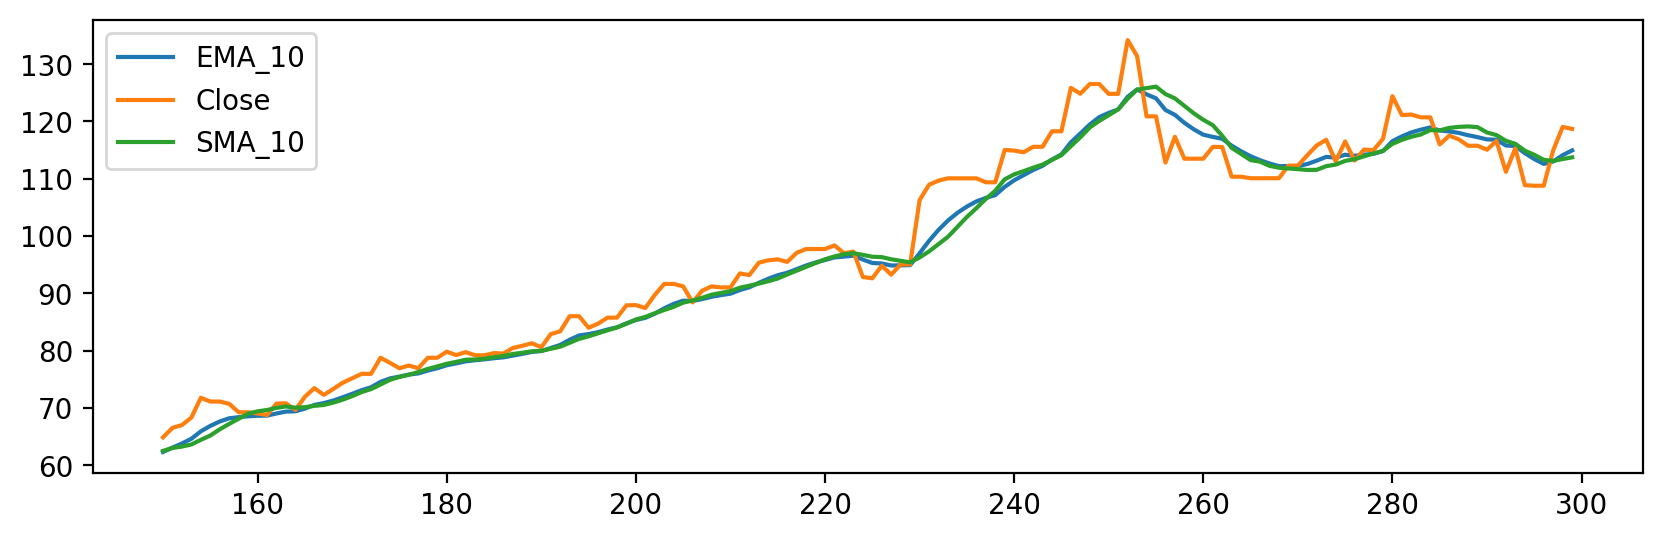

In [25]:
df["SMA_10"] = df["Close"].rolling(10).mean()
df[["EMA_10", "Close", "SMA_10"]][150:300].plot()

In [26]:
# faster way to compute EMA
df["EMA_10_new"] = df['Close'].ewm(span=10).mean()
print(df[["EMA_10_new", "EMA_10"]])

     EMA_10_new      EMA_10
0     51.424999         NaN
1     51.904875         NaN
2     52.062708         NaN
3     52.140062         NaN
4     52.542664         NaN
..          ...         ...
499  148.394040  148.394040
500  148.238759  148.238759
501  148.111711  148.111711
502  148.007762  148.007762
503  148.702715  148.702715

[504 rows x 2 columns]


##### MACD

MACD(12,26,9) is referred to:
<br>
MACD = 12-Period EMA − 26-Period EMA
<br>
Signal line = 9-Period SMA of MACD


In [27]:
def macd(df):
    df["EMA_12"] = df['Close'].ewm(span=12).mean()
    df["EMA_26"] = df['Close'].ewm(span=26).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['Signal Line'] = df['MACD'].ewm(span=9).mean()


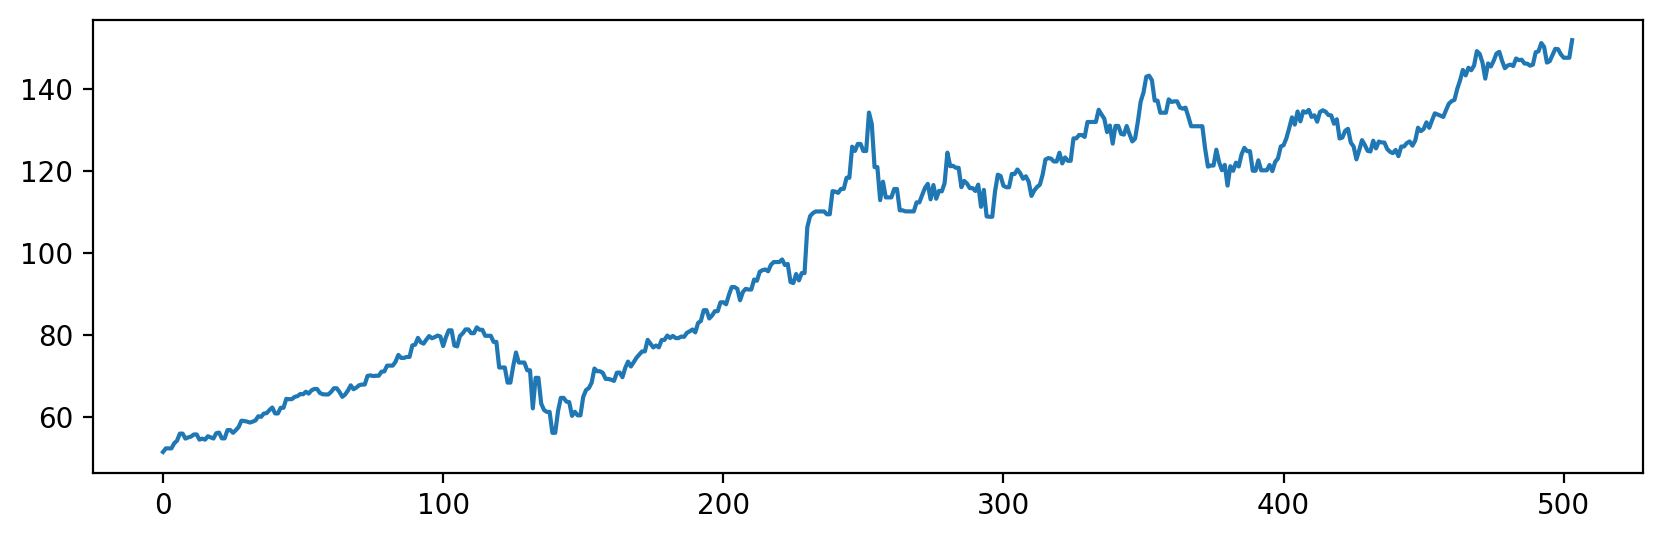

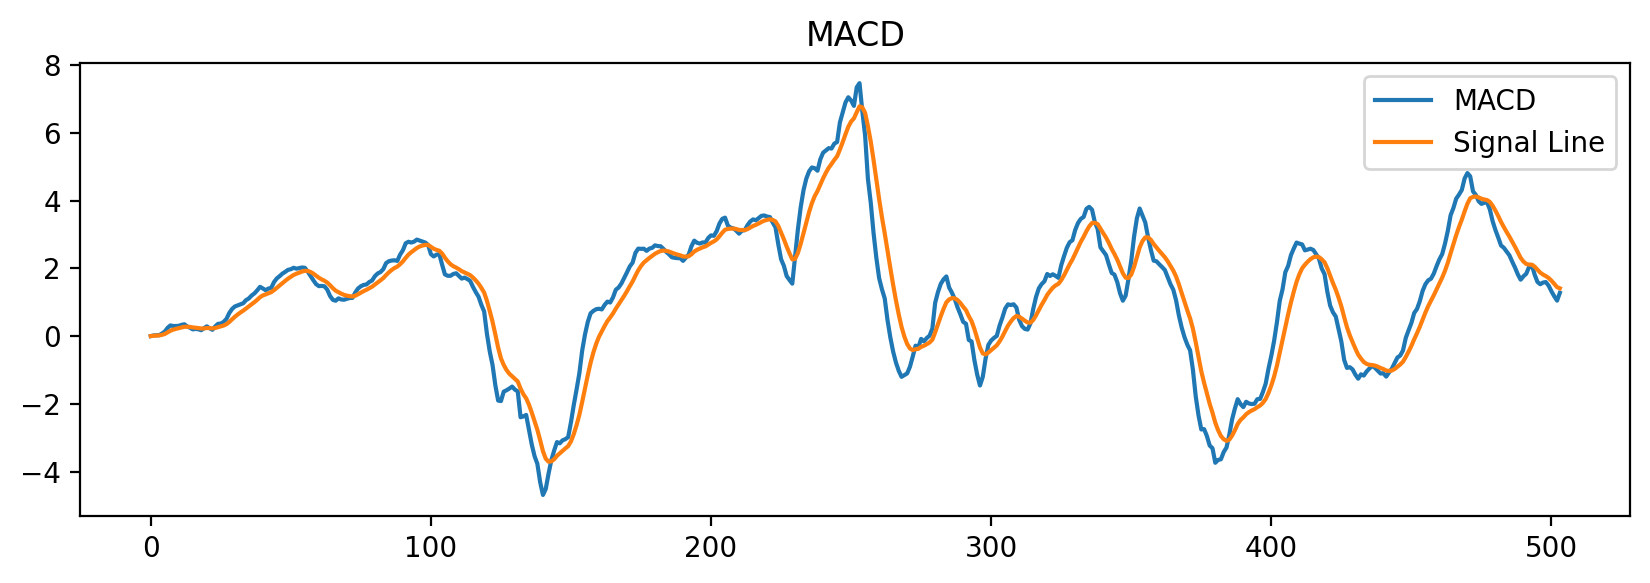

In [28]:
signal_df = df[["Close"]]
macd(signal_df)
df["Close"].plot()
plt.show()
signal_df[['MACD', "Signal Line"]].plot(title="MACD")
plt.show()

Whenever MACD crosses above the signal line it is a bullish signal, and a bearish signal when it falls below. 

#### RSI
The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes, to evaluate overbought or oversold conditions in the price of a stock or other asset.
In details, it describes the current price relative to average high and low prices over a previous trading period.

<br>
It uses a standardization formula to ensure all values are placed on a scale of 0-100. An asset is usually considered overbought when the RSI is above 70% and oversold when it is below 30%.

<br>
<br>

It is computed using the Relative Strength (RS) of the current market, which considers the average gain or loss used in the calculation is the average percentage gain or loss during a look-back period. Usually a period of 14 days is used. 


<img src="data/press_images/rsi-formulae-alpharithms.jpg" width="600" height="800"/>

In [29]:
df["Diff"] = df['Close'].diff()  # gain and loss for each day, daily return 
df["Gain"] = np.where(df["Diff"] > 0, df["Diff"], 0)  # save all the days with a gain and its value
df["Loss"] = np.where(df["Diff"] < 0, -df["Diff"], 0)  # save all the days with a loss and its positive value

df[["Close", "Diff", "Gain", "Loss"]][30:50]

,Close,Diff,Gain,Loss
30,58.830002,-0.137497,0.000000,0.137497
31,58.592499,-0.237503,0.000000,0.237503
32,58.820000,0.227501,0.227501,0.000000
33,59.102501,0.282501,0.282501,0.000000
34,60.127499,1.024998,1.024998,0.000000
35,59.990002,-0.137497,0.000000,0.137497
36,60.794998,0.804996,0.804996,0.000000
37,60.895000,0.100002,0.100002,0.000000
38,61.645000,0.750000,0.750000,0.000000
39,62.262501,0.617501,0.617501,0.000000


In [30]:
# now compute the average of these loss and gain in the past
days = 14
df['Avg_gain'] = df['Gain'].rolling(days).mean() # rolling mean 14 of gains
df['Avg_loss'] = df['Loss'].rolling(days).mean() # //

# compute the RS
df["RS"] = df["Avg_gain"] / df["Avg_loss"]

# compute the RSI
df['RSI'] = 100 - (100/(1+df['RS']))

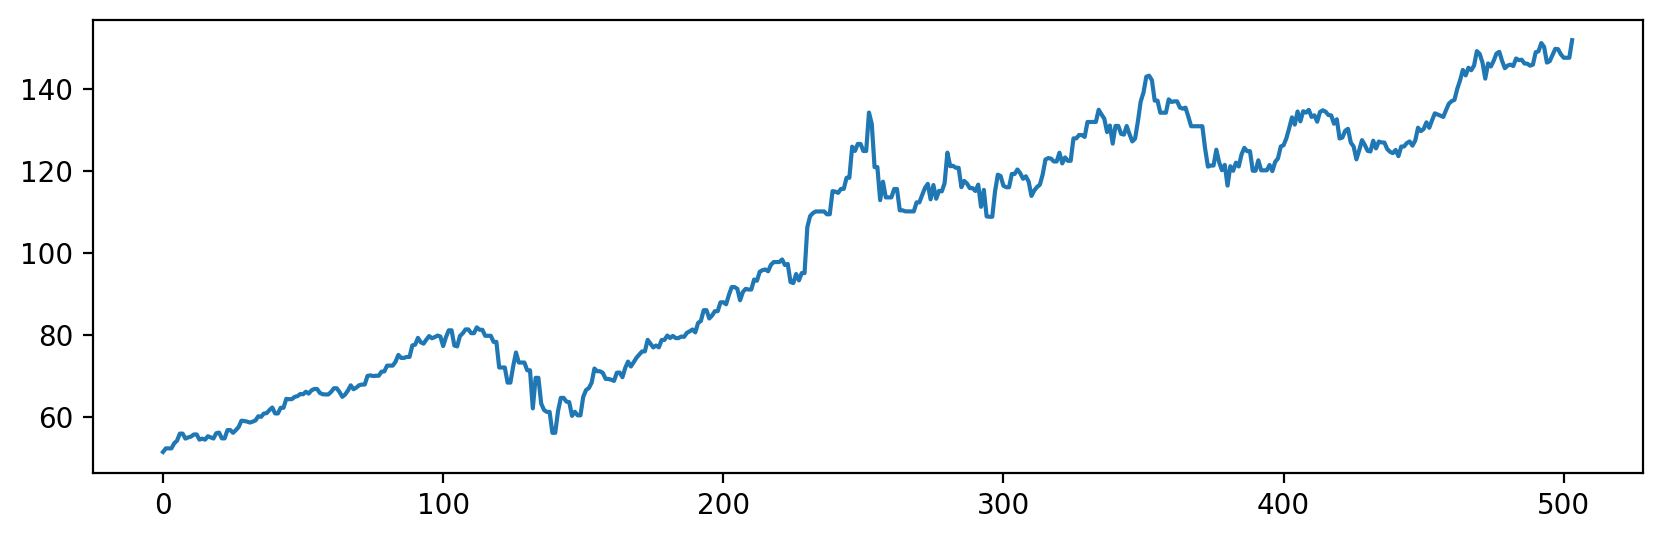

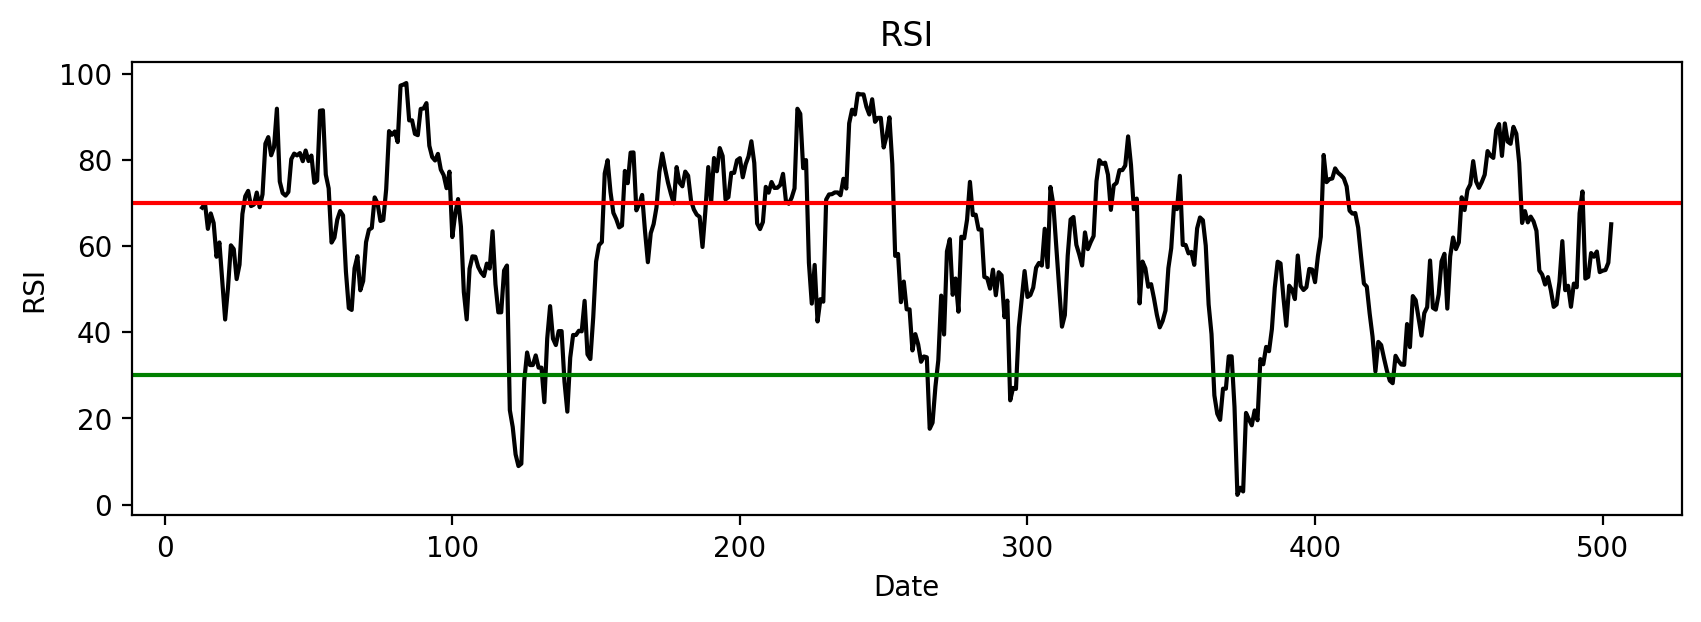

In [31]:
df["Close"].plot()
plt.show()
plt.figure(2)
ax = df['RSI'].plot(title="RSI", color="black")
ax.set_xlabel("Date")
ax.set_ylabel("RSI")
plt.axhline(y=30,color='green')
plt.axhline(y=70,color='red')

#### Python libraries to compute indicators

Pandas_ta - https://pypi.org/project/pandas-ta/

<AxesSubplot:>

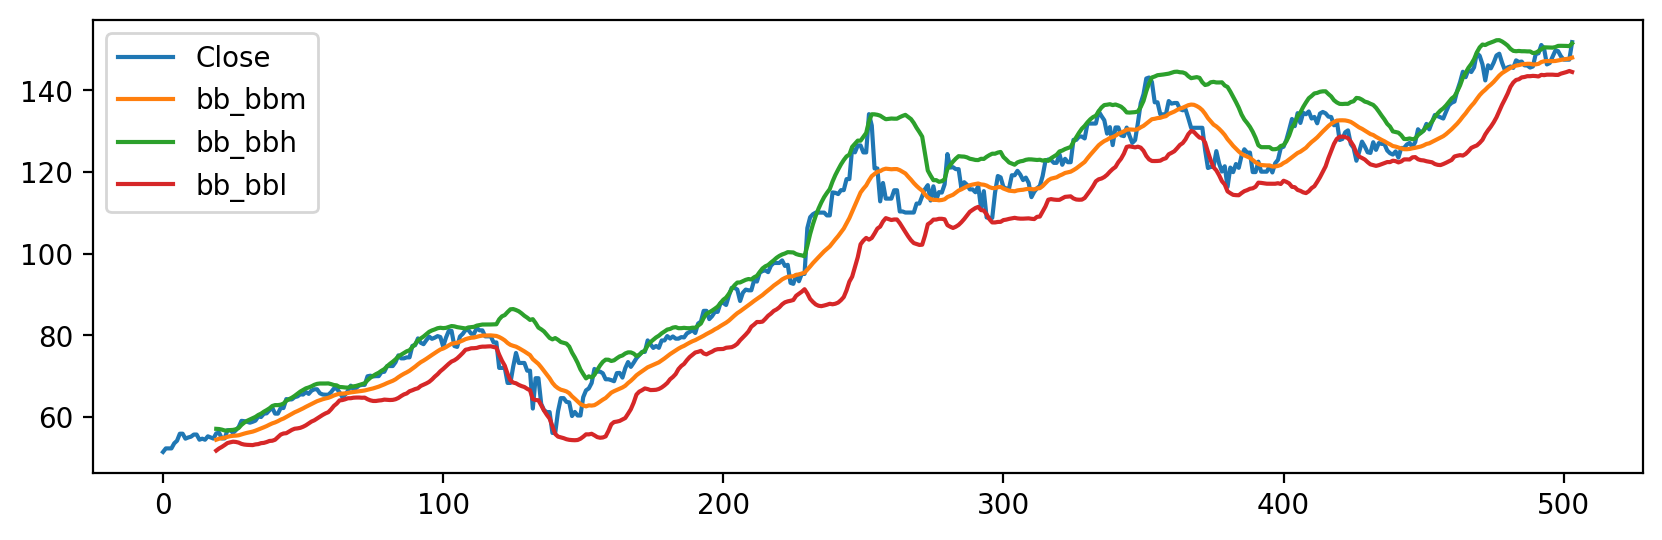

In [32]:

from ta.utils import dropna
from ta.volatility import BollingerBands

# Initialize Bollinger Bands Indicator
df = df[["Close"]]
indicator_bb = BollingerBands(close=df["Close"], window=20, window_dev=2)

# Add Bollinger Bands features
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()

df.plot()

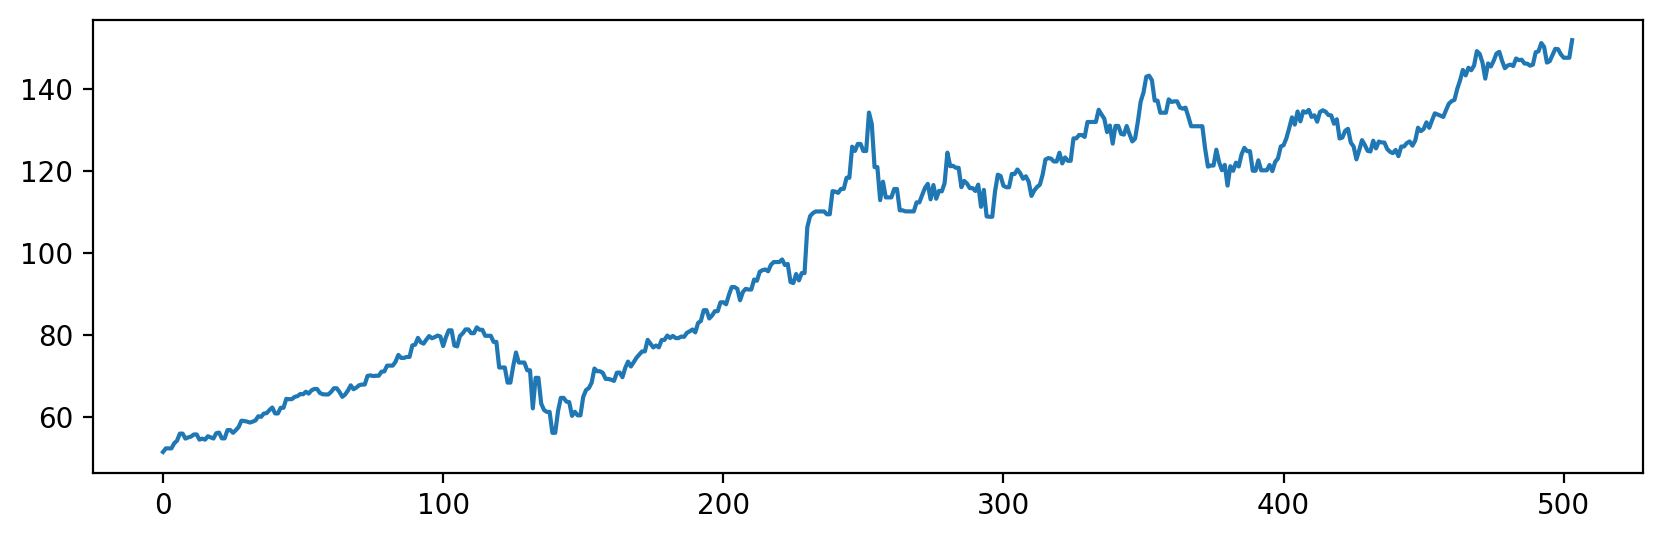

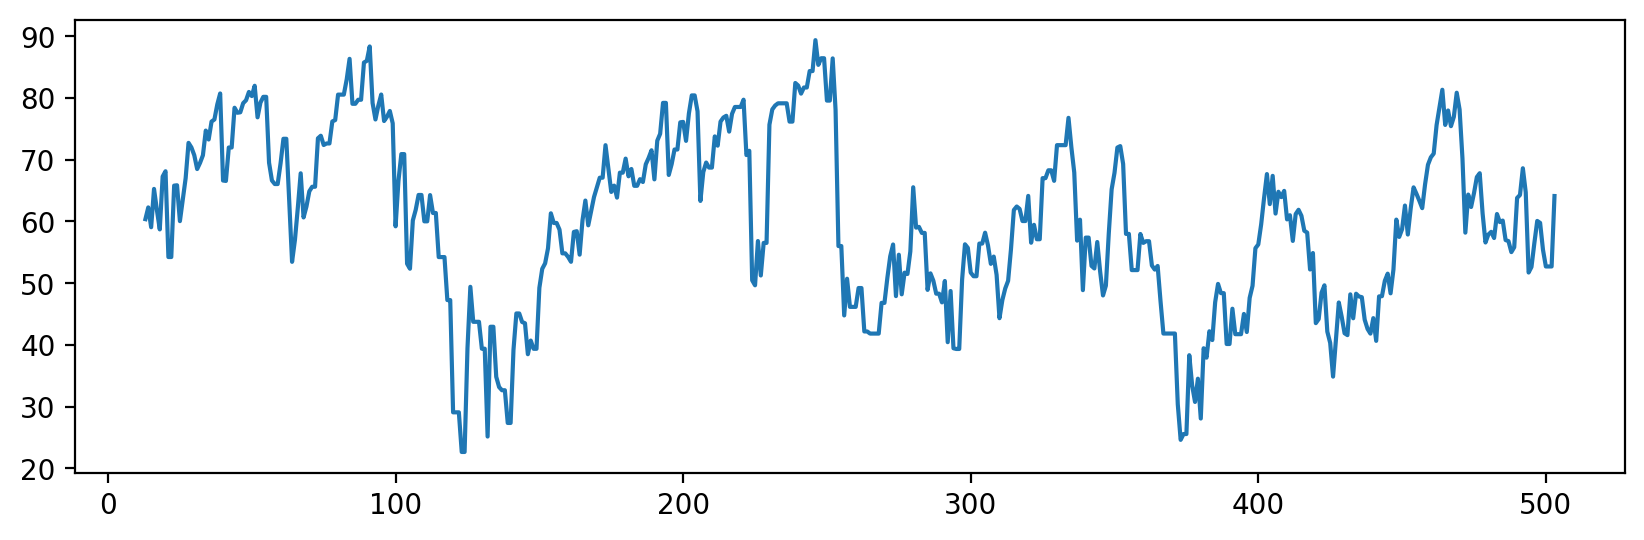

In [33]:
from ta.momentum import rsi

# Initialize Bollinger Bands Indicator
df = df[["Close"]]
rsi = rsi(close=df["Close"])
df["RSI"] = rsi

df["Close"].plot()
plt.show()
df["RSI"].plot()
plt.show()

## Others tecnical indicators:
1 - Moving average (MA)
<br>
2 - Exponential moving average (EMA)
<br>
3 - Moving average convergence divergence (MACD)
<br>
4 - Bollinger bands
<br>
5 - Relative strength index (RSI)
<br>
6 - Fibonacci retracement
<br>
7 - Ichimoku cloud
<br>
8 - Standard deviation
<br>
9 - Average directional index


## Useful Python libraries:
- Tulipy for indicators  - https://github.com/cirla/tulipy 
<br>
- zipline – Pythonic algorithmic trading library - https://pypi.org/project/zipline/
<br>
- yahoo-finance – Python module to get stock data from Yahoo! Finance. https://github.com/lukaszbanasiak/yahoo-finance
<br>
- trading_calendars – Stock Exchange Trading Calendars.  https://github.com/quantopian/trading_calendars
